## Image Data Augmentation

Image data augmentation is a technique used to artificially expand the size of the training dataset by creating modified versions of the images in the dataset. Training deep neural network models on more data can result in more capable models. Keras ImageDataGenerator is used for this purpose.

type:  <class 'PIL.JpegImagePlugin.JpegImageFile'>
image format:  JPEG
image mode:  RGB
image size:  (300, 168)


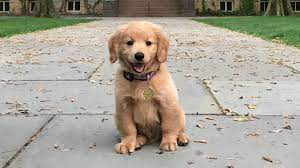

In [1]:
from keras.preprocessing.image import load_img, ImageDataGenerator

img = load_img('./images/img.jpg')

print('type: ', type(img))
print('image format: ', img.format)
print('image mode: ', img.mode)
print('image size: ', img.size)
img

In [2]:
#from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import img_to_array

data = img_to_array(img)

print(type(data))
print(data.shape)
print(data)

<class 'numpy.ndarray'>
(168, 300, 3)
[[[ 52.  42.  30.]
  [ 51.  41.  29.]
  [ 50.  42.  31.]
  ...
  [ 61.  57.  45.]
  [ 56.  52.  40.]
  [ 51.  49.  36.]]

 [[133. 125. 112.]
  [112. 104.  93.]
  [ 97.  91.  79.]
  ...
  [103.  99.  87.]
  [ 99.  95.  84.]
  [ 95.  93.  81.]]

 [[ 29.  23.  11.]
  [ 18.  12.   0.]
  [ 24.  17.   7.]
  ...
  [  8.   4.   0.]
  [  4.   1.   0.]
  [  3.   0.   0.]]

 ...

 [[161. 156. 150.]
  [169. 164. 158.]
  [176. 171. 165.]
  ...
  [191. 191. 189.]
  [191. 191. 189.]
  [191. 191. 189.]]

 [[166. 161. 155.]
  [178. 173. 167.]
  [167. 162. 156.]
  ...
  [191. 191. 189.]
  [191. 191. 189.]
  [191. 191. 189.]]

 [[179. 174. 168.]
  [148. 143. 137.]
  [115. 110. 104.]
  ...
  [190. 190. 188.]
  [190. 190. 188.]
  [190. 190. 188.]]]


In [3]:
import numpy as np

# ImageDataGeneratorun parametre olarak istediği shape'e dönüştürüldü
samples = np.expand_dims(data, 0)

print(type(samples))
print(samples.shape)
print(samples)

<class 'numpy.ndarray'>
(1, 168, 300, 3)
[[[[ 52.  42.  30.]
   [ 51.  41.  29.]
   [ 50.  42.  31.]
   ...
   [ 61.  57.  45.]
   [ 56.  52.  40.]
   [ 51.  49.  36.]]

  [[133. 125. 112.]
   [112. 104.  93.]
   [ 97.  91.  79.]
   ...
   [103.  99.  87.]
   [ 99.  95.  84.]
   [ 95.  93.  81.]]

  [[ 29.  23.  11.]
   [ 18.  12.   0.]
   [ 24.  17.   7.]
   ...
   [  8.   4.   0.]
   [  4.   1.   0.]
   [  3.   0.   0.]]

  ...

  [[161. 156. 150.]
   [169. 164. 158.]
   [176. 171. 165.]
   ...
   [191. 191. 189.]
   [191. 191. 189.]
   [191. 191. 189.]]

  [[166. 161. 155.]
   [178. 173. 167.]
   [167. 162. 156.]
   ...
   [191. 191. 189.]
   [191. 191. 189.]
   [191. 191. 189.]]

  [[179. 174. 168.]
   [148. 143. 137.]
   [115. 110. 104.]
   ...
   [190. 190. 188.]
   [190. 190. 188.]
   [190. 190. 188.]]]]


### Image Scrolling/Shifting/Panning

Image panning means moving all the pixels of the image in one direction, such as horizontally or vertically, **while keeping the image dimensions the same** 

In [4]:
# width_shift_range/height_shift_range: Control the amount of scrolling
datagen = ImageDataGenerator(width_shift_range = [-50, 50], 
                             height_shift_range = [-50, 50])

it = datagen.flow(samples, batch_size = 1)

print(type(it.next()))
print(it.next().shape)
print(it.next())

<class 'numpy.ndarray'>
(1, 168, 300, 3)
[[[[ 58.  66.  43.]
   [ 61.  66.  44.]
   [ 74.  79.  57.]
   ...
   [ 51.  49.  36.]
   [ 51.  49.  36.]
   [ 51.  49.  36.]]

  [[ 58.  66.  43.]
   [ 61.  66.  44.]
   [ 74.  79.  57.]
   ...
   [ 51.  49.  36.]
   [ 51.  49.  36.]
   [ 51.  49.  36.]]

  [[ 58.  66.  43.]
   [ 61.  66.  44.]
   [ 74.  79.  57.]
   ...
   [ 51.  49.  36.]
   [ 51.  49.  36.]
   [ 51.  49.  36.]]

  ...

  [[162. 162. 160.]
   [180. 180. 178.]
   [156. 156. 154.]
   ...
   [170. 170. 170.]
   [170. 170. 170.]
   [170. 170. 170.]]

  [[175. 175. 173.]
   [182. 182. 180.]
   [130. 130. 128.]
   ...
   [175. 175. 175.]
   [175. 175. 175.]
   [175. 175. 175.]]

  [[162. 162. 160.]
   [129. 129. 127.]
   [ 90.  90.  88.]
   ...
   [192. 192. 192.]
   [192. 192. 192.]
   [192. 192. 192.]]]]


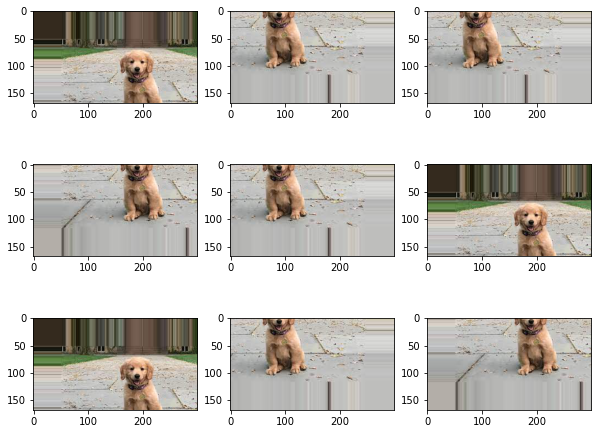

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
for i in range(9):
    #plt.subplot(330 + 1 + i)
    plt.subplot(3, 3, (i + 1))
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
    
plt.show()

### Image Inversion

An image flipping means inverting rows or columns of pixels in the case of flipping vertically or horizontally, respectively

In [6]:
datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = False)
it = datagen.flow(samples, batch_size = 1)

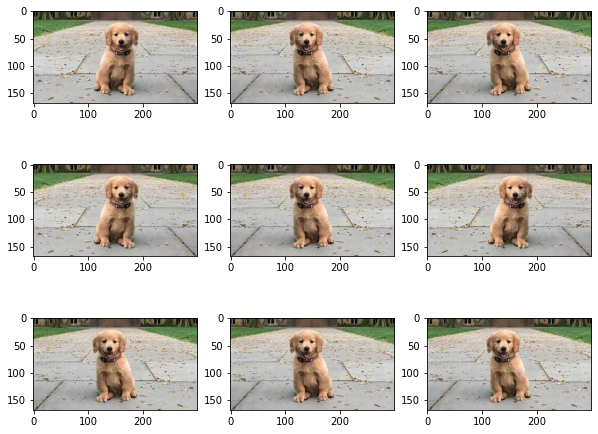

In [7]:
plt.figure(figsize = (10, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
    
plt.show()

### Random Flipping

In [8]:
datagen = ImageDataGenerator(rotation_range = 90)

it = datagen.flow(samples, batch_size = 1)

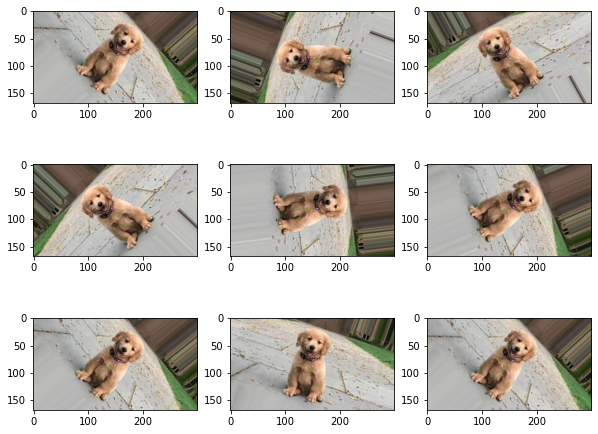

In [9]:
plt.figure(figsize = (10, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
    
plt.show()

### Random Brightness

In [10]:
# brightness_range: 1.0 dan küçük değerler görüntüyü koyulaştırır. 1.0 dan büyük değerler görüntüyü aydınlatır
datagen = ImageDataGenerator(brightness_range = [0.2, 1.0])

it = datagen.flow(samples, batch_size = 1)

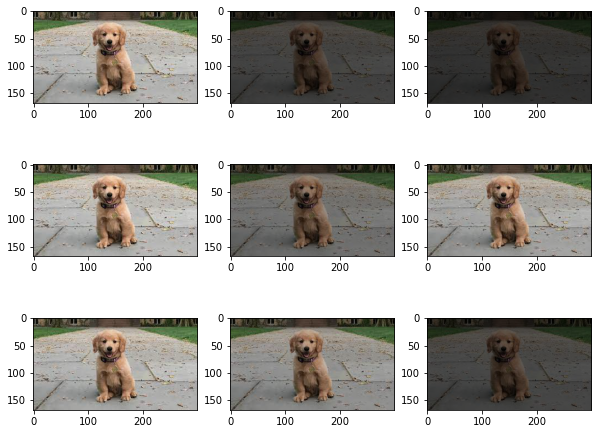

In [11]:
plt.figure(figsize = (10, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
    
plt.show()

### Random Zoom

In [12]:
#datagen = ImageDataGenerator(zoom_range = 0.5)  # [0.5, 1.5]
datagen = ImageDataGenerator(zoom_range = [0.5, 1.5])

it = datagen.flow(samples, batch_size = 1)

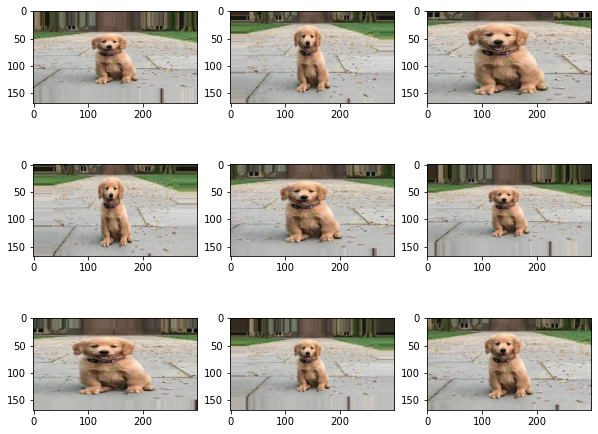

In [13]:
plt.figure(figsize = (10, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
    
plt.show()